# Микишева Мария Б03-212 
# Задания Т12 - Т13 

In [345]:
import numpy as np
import pandas as pd
from scipy.integrate import quad
from scipy.optimize import minimize
from tqdm import tqdm
import matplotlib.pyplot as plt
import scipy.stats as sps
from scipy.stats import chi2, kstwobign , t, moment
from scipy import stats
from math import *
import statistics
from sklearn import preprocessing


In [346]:
α = 0.05

## T12

1ый подход (принимаем решение о гипотезе через p-value)

In [347]:
delta = 48

In [348]:
p_value = 1 - stats.chi2.cdf(delta, 24)
print(f'p_value =  {round(p_value, 5)} < α = 0.05')
print("Отвергаем гипотезу H0")

p_value =  0.00252 < α = 0.05
Отвергаем гипотезу H0


2ой подход (Определяем крит. область, а затем можем исследовать мощность критерия и ошибки)

$$
\begin{align}
G_{крит}: \Delta \ge С\\
\Delta \backsim \chi^2(24)
\end{align}
$$

Ищем С

$α_1$ = $P$ ( $\Delta$ $\ge$ С | $H_0$) = $α$ = 0.05 => $\int_C^\infty p_{\chi^2(24)}(x)\,dx$ = 0.05


In [349]:
1 - stats.chi2.cdf(36.415028, 24)

0.05000000567133844

С  $\approx$  36.415028

Тогда
$$
\begin{align}
G_{крит}: \frac{24*s^2}{0.1} \ge 36.415\\
\end{align}
$$

In [350]:
36.415*0.1/24

0.15172916666666666

$$
\begin{align}
G_{крит}: s^2 \ge 0.152\\
\end{align}
$$

Исследование мощности

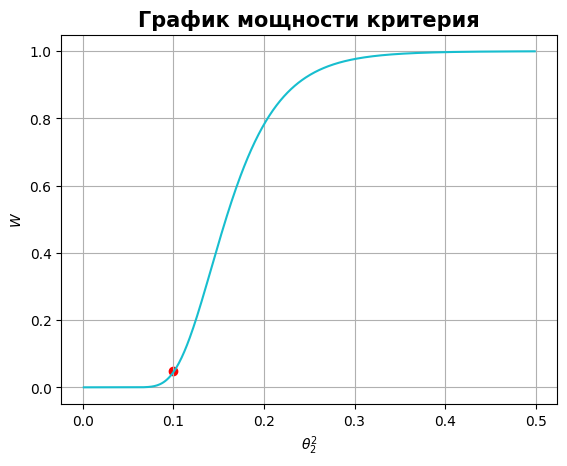

In [351]:
C = 36.415
tetas = np.array(np.arange(0.001, 0.5, 0.001))
W = np.array([1 - stats.chi2.cdf(3.684/(d), 24) for d in tetas])

plt.title('График мощности критерия', fontsize=15,  fontweight='bold')
plt.xlabel(r'$θ_2^2$')
plt.ylabel(r'$W$')
plt.plot(tetas, W, color = 'tab:cyan')
plt.scatter(0.1, α, color = 'r')
plt.grid(True)

## T13

Выборки:

In [352]:
X_n = [-1.11, -6.10, 2.42]
Y_m = [-2.29, -2.91]
σ2_x = 2
σ2_y = 1
n = 3
m = 2

In [353]:
x_mean = np.mean(X_n)
y_mean = np.mean(Y_m)
print(f'x_mean = {round(x_mean, 3)}, y_mean = {round(y_mean, 3)}')

x_mean = -1.597, y_mean = -2.6


$$
\begin{align}
\Delta = \frac{<x>-<y>}{\sqrt{\frac{σ_x^2}{n} + \frac{σ_y^2}{m}}}\\
\ \\
\Delta \backsim N(0,1)
\end{align}
$$

In [354]:
delta = (x_mean - y_mean)/ sqrt((σ2_x)/(n) + (σ2_y)/(m))
print("delta = ", delta)

delta =  0.9289061667717935


1.  $a \ne b$

In [355]:
p_value = 2*(1 - stats.norm.cdf(delta, 0, 1))
print(f'p_value =  {round(p_value, 5)} > α = 0.05')
print(f'Нет оснований отвергнуть гипотезу H0')

p_value =  0.35294 > α = 0.05
Нет оснований отвергнуть гипотезу H0


2.  $a < b$

In [356]:
p_value = stats.norm.cdf(-delta, 0, 1)
print(f'p_value =  {round(p_value, 5)} > α = 0.05')
print(f'Нет оснований отвергнуть гипотезу H0')

p_value =  0.17647 > α = 0.05
Нет оснований отвергнуть гипотезу H0


3. $a > b$

In [357]:
p_value = 1 - stats.norm.cdf(delta, 0, 1)
print(f'p_value =  {round(p_value, 5)} > α = 0.05')
print(f'Нет оснований отвергнуть гипотезу H0')

p_value =  0.17647 > α = 0.05
Нет оснований отвергнуть гипотезу H0
